<a href="https://colab.research.google.com/github/AKlebedeff/AKlebedeff2/blob/main/1_%D0%91%D0%B8%D0%BD%D0%B0%D1%80%D0%BD%D0%B0%D1%8F_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%86%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Вычислить коэффициенты ω = [ω0, ω1, ω2]T разделяющей линии, которая определяется выражением:  
ω1x1 + ω2x2 + ω0 = 0.
2. Вычислить отступы (margin) для зеленых точек (с меткой класса +1) и синих точек (с меткой класса -1).
Отступ вычисляется по формуле:  
Mi = yi (ω, xi) , i = 1, 2, 3, 4;
где yi ∈ {+1; -1} - метка класса образа (точки);

(ω, xi) = ω1x1 + ω2x2 + ω0  - скалярное произведение векторов.
Вектор  должен быть подобран так, чтобы для наиболее удаленных точек от разделяющей линии отступ был положительным, а для ближних – отрицательным.

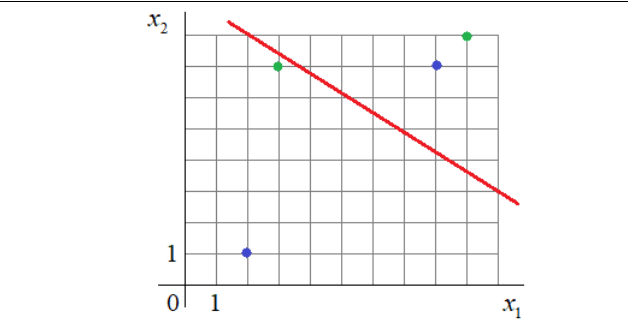

Классифицирована верно Точка [2 1]: m=-56, Ym=56, prediction=-1, true=-1
Классифицирована неверно Точка [8 7]: m=22, Ym=-22, prediction=1, true=-1
Классифицирована неверно Точка [3 7]: m=-3, Ym=-3, prediction=-1, true=1
Классифицирована верно Точка [9 8]: m=35, Ym=35, prediction=1, true=1


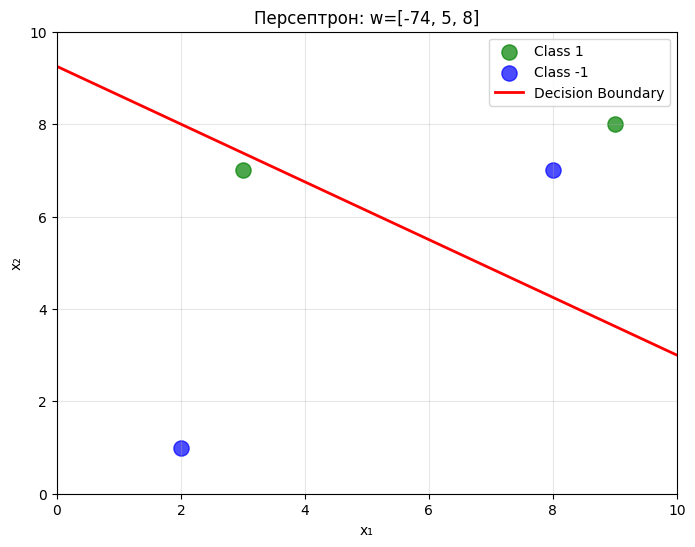

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Вход Данные
x_train = np.array([[2, 1], [8, 7], [3, 7], [9, 8]])
y_train = np.array([-1, -1, 1, 1]) #метки класса
n_train = len(x_train)
w = np.array([-74, 5, 8])  # готовые веса

# Решающее правило
a = lambda x: np.sign(w[0] + w[1]*x[0] + w[2]*x[1]) #sign(w,x)=-1c1, 1c2

# Проверка классификации
errors = 0
for i in range(n_train):
    m = w[0] + w[1]*x_train[i][0] + w[2]*x_train[i][1]
    prediction = a(x_train[i])
    status = "Классифицирована верно" if prediction == y_train[i] else "Классифицирована неверно" #если ответ решающего правила  не совпадает с целевым ,
    #то формируется значение True, то есть, 1.
    #И, наоборот, при совпадении, будем получать False и значение 0 - Ф. Розенблатт
    print(f"{status} Точка {x_train[i]}: m={w[0] + w[1]*x_train[i][0] + w[2]*x_train[i][1]}, Ym={y_train[i]*m}, prediction={prediction}, true={y_train[i]}")
    errors += prediction != y_train[i]
# если модель   сформирована верно и линия действительно делит образы на два класса,
# то для любой точки класса 1  скалярное произведение с вектором параметров  будет положительным,
#а для точек класса -1  - отрицательным:

# Визуализация
plt.figure(figsize=(8, 6))

# Разделяем точки по классам
for class_val, color in [(1, 'green'), (-1, 'blue')]:
    mask = y_train == class_val
    plt.scatter(x_train[mask, 0], x_train[mask, 1], color=color, s=120,
                label=f'Class {class_val}', alpha=0.7)

# Разделяющая линия
x_line = np.linspace(0, 10, 100)
y_line = (-w[0] - w[1]*x_line) / w[2]
plt.plot(x_line, y_line, 'r-', linewidth=2, label='Decision Boundary')

# Настройки графика
plt.xlim(0, 10); plt.ylim(0, 10)
plt.xlabel('x₁'); plt.ylabel('x₂')
plt.title(f'Персептрон: w=[{w[0]}, {w[1]}, {w[2]}]')
plt.legend(); plt.grid(True, alpha=0.3)
plt.show()
